In [103]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [125]:
#Load and View dataset
df = pd.read_csv('train.csv')
df.head()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,2010,EPX,Travel Agency,Online,Cancellation Plan,61,PHILIPPINES,12.0,0.00,41,0
1,4245,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,17.0,0.00,35,0
2,9251,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,26,THAILAND,19.8,11.88,47,0
3,4754,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,HONG KONG,27.0,0.00,48,0
4,8840,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,MALAYSIA,37.0,0.00,36,0


In [126]:
#Check for missing values
df.isnull().sum()

ID                      0
Agency                  0
Agency Type             0
Distribution Channel    0
Product Name            0
Duration                0
Destination             0
Net Sales               0
Commision (in value)    0
Age                     0
Claim                   0
dtype: int64

In [127]:
#Check dtypes
df.dtypes

ID                        int64
Agency                   object
Agency Type              object
Distribution Channel     object
Product Name             object
Duration                  int64
Destination              object
Net Sales               float64
Commision (in value)    float64
Age                       int64
Claim                     int64
dtype: object

In [128]:
#Change dtype of Claim
df['Claim'] = df['Claim'].astype('category')

In [129]:
#Drop rows with duration < 0
df = df[df['Duration'] >= 0]

In [130]:
#Make copies of dataframe
df_le = df.copy()
df_onehot = df.copy()

In [131]:
#Split the data into numerical and categorical features
num = df.select_dtypes(include = np.number)
cat = df.select_dtypes(exclude = np.number)

In [132]:
#Drop ID from num
num = num.drop(['ID'], 1)

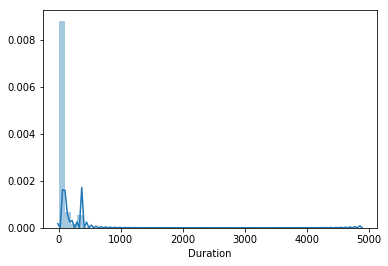

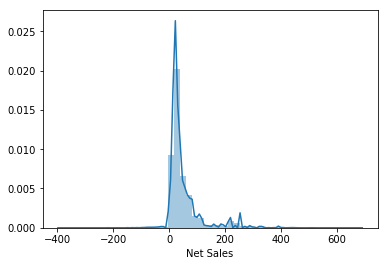

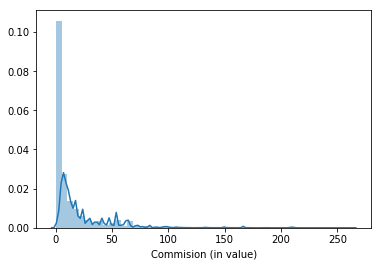

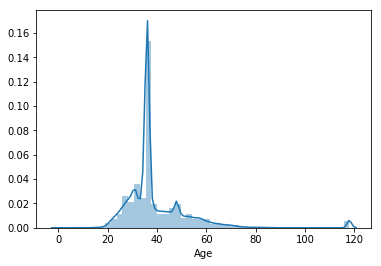

In [133]:
#View Histogram of numerical features
for column in list(num):
    sns.distplot(num[column])
    plt.show()

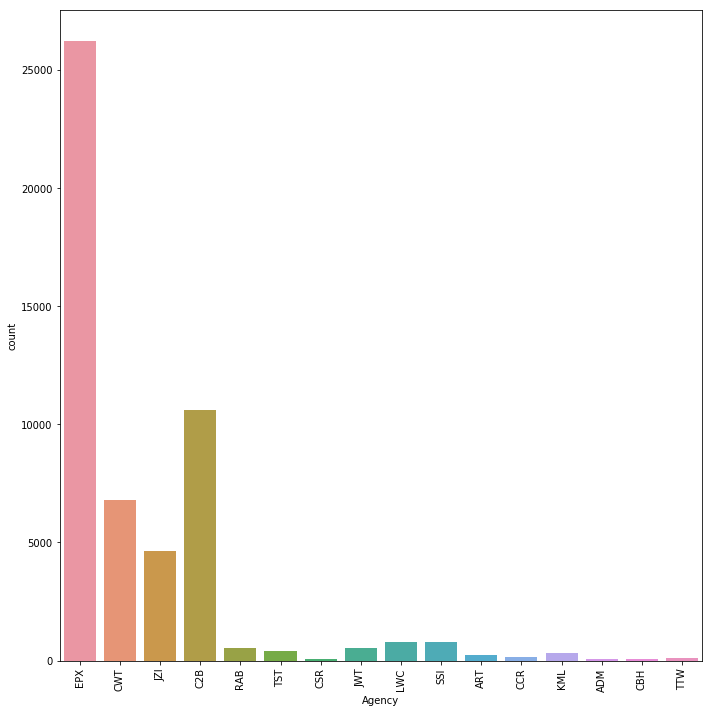

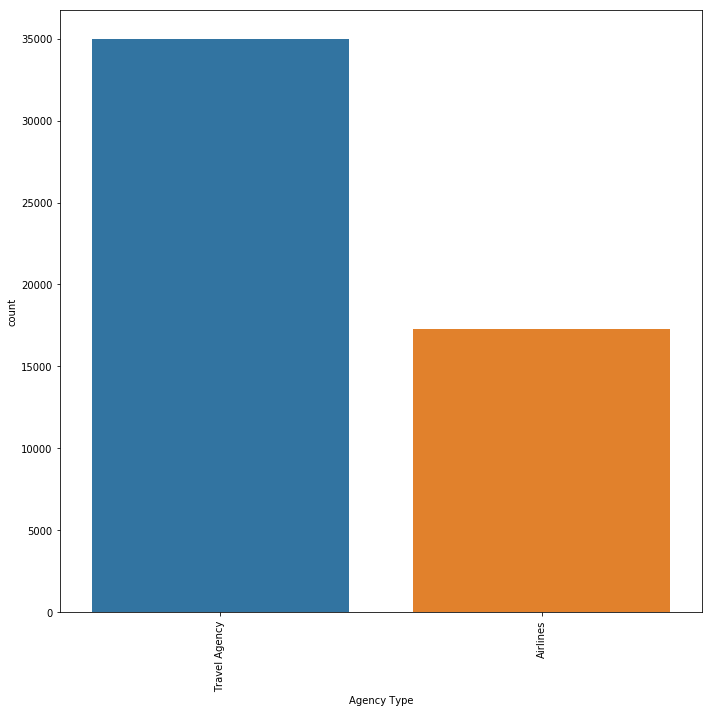

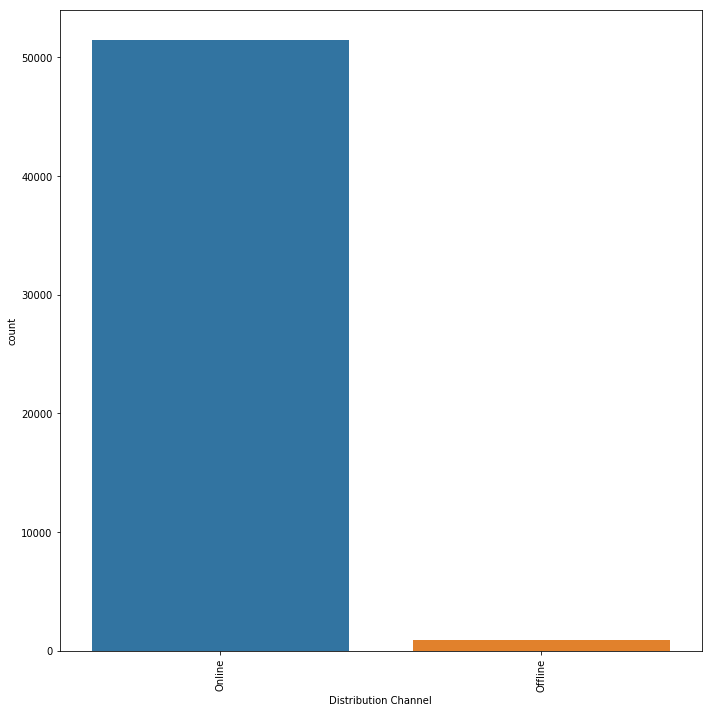

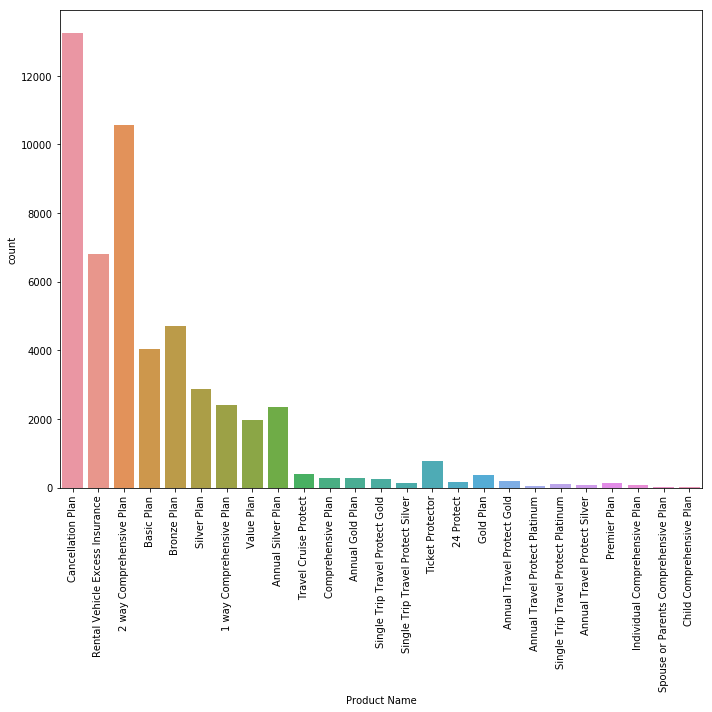

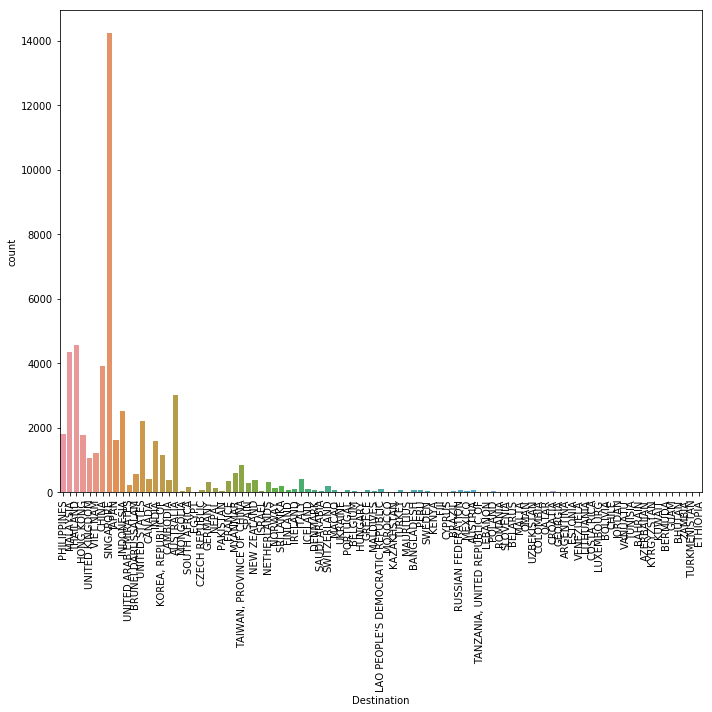

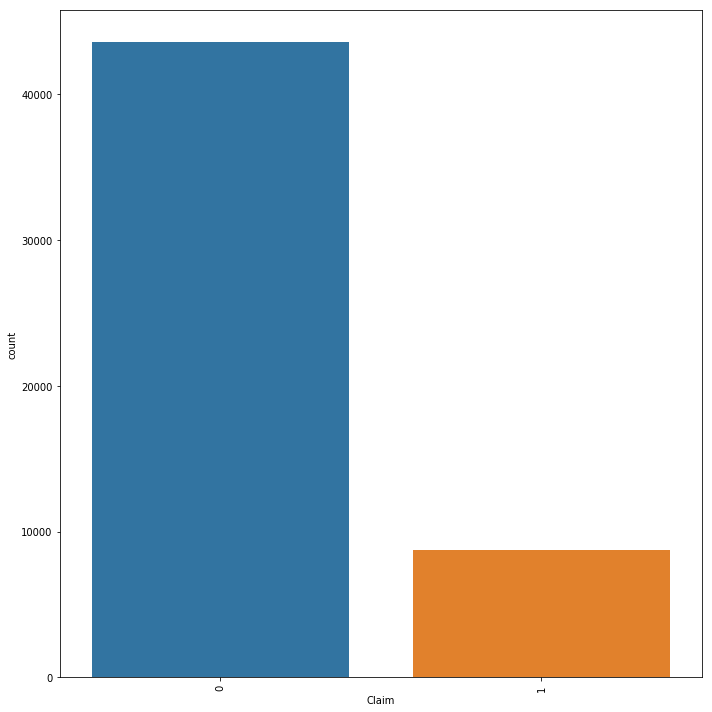

In [134]:
#View countplot of categorical features
for column in list(cat):
    plt.figure(figsize = (10,10))
    sns.countplot(cat[column])
    plt.xticks(rotation = 90)
    plt.tight_layout()
    plt.show()

In [135]:
#Import and Initialzie Label Encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [136]:
#Label encode categorical features
for column in list(df_le):
    if df_le[column].dtypes == 'object':
        df_le[column] = le.fit_transform(df_le[column])

In [145]:
#Save dataframe to csv
df_le.to_csv('train (le).csv', index = False)